# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
%%time
data = get_date_list(data)
data = run_engine(data)

 29%|████████▋                     | 554984/1918514 [00:32<01:31, 14873.12it/s]

pls    0.014
dtype: float64
--------------------------------------
                  date ord_types               close_type      pls
15 2021-01-07 08:56:43     short  simple_slema_move_close  0.00001
16 2021-01-07 11:15:18     short  simple_slema_move_close  0.00193
17 2021-01-07 12:17:41      long  simple_slema_move_close  0.00001
18 2021-01-07 14:00:58      long  simple_slema_move_close  0.00002
19 2021-01-07 15:55:46     short  simple_slema_move_close  0.00001
20 2021-01-08 01:14:58      long                all_close -0.00359
21 2021-01-08 01:14:58     short                all_close  0.00370
22 2021-01-08 04:43:18      long  simple_slema_move_close  0.00003
23 2021-01-08 08:26:56     short  simple_slema_move_close  0.00189
24 2021-01-08 12:52:49      long  simple_slema_move_close  0.00081
25 2021-01-08 13:59:17      long  simple_slema_move_close  0.00001
26 2021-01-08 15:45:11     short  simple_slema_move_close  0.00138
27 2021-01-08 16:18:33      long  simple_slema_move_close  0.0

100%|█████████████████████████████| 1918514/1918514 [02:02<00:00, 15610.59it/s]

Wall time: 2min 24s


In [7]:
data['orders_list']

{'total_pl': -0.01264,
 1: {'open_order_type': 'short', 'bid': 1.21993, 'pl': 0.00762},
 2: {'open_order_type': 'long', 'ask': 1.2224, 'pl': -0.02026}}

No handles with labels found to put in legend.


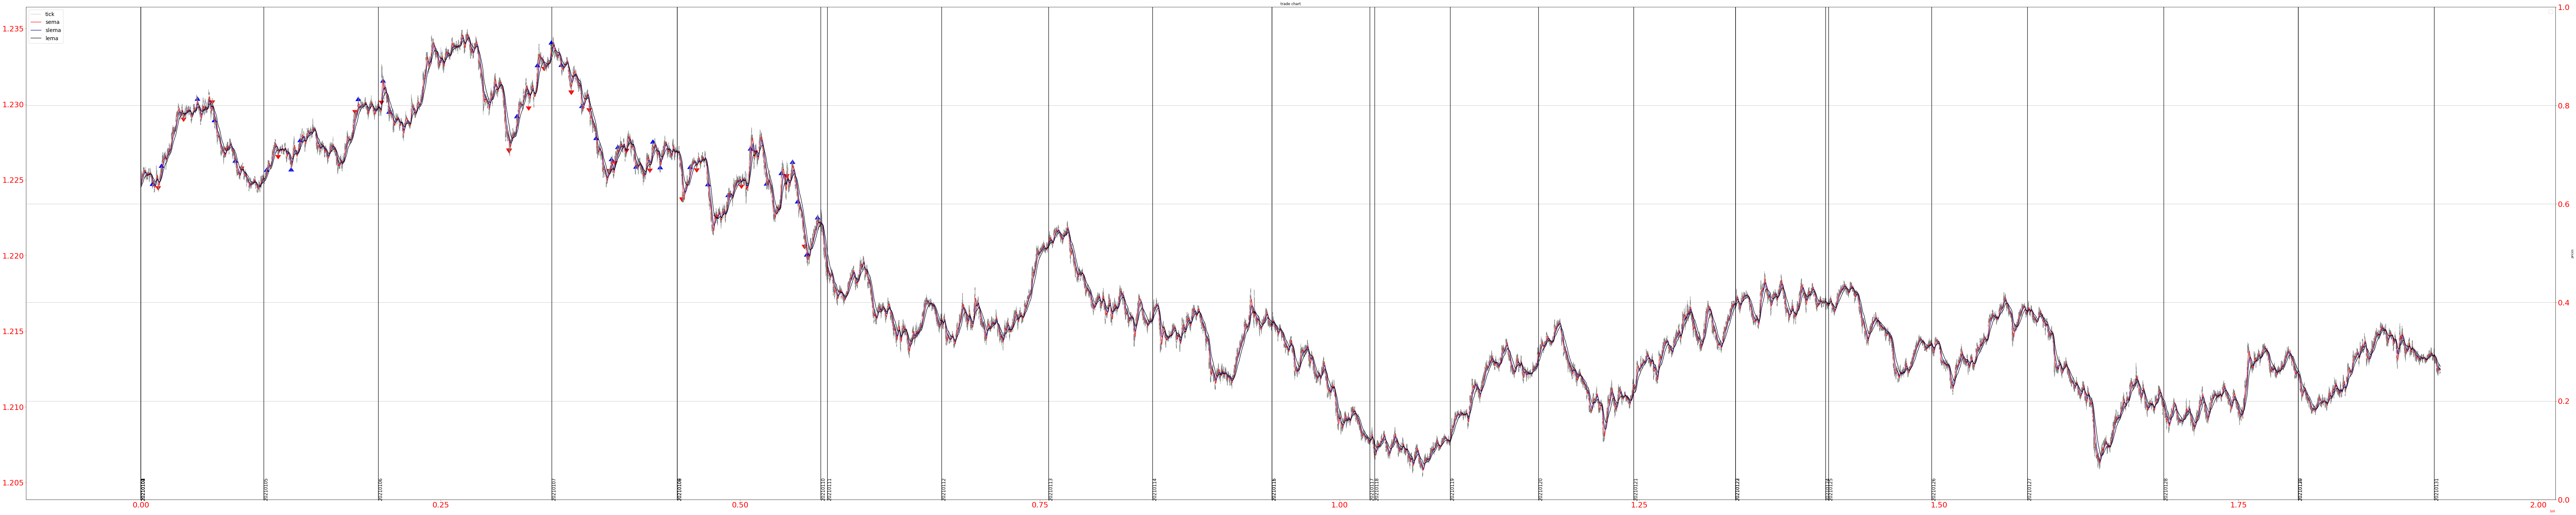

-----------------------------------------------------
date_val          : ['20210101', '20210102', '20210103', '20210104', '20210105', '20210106', '20210107', '20210108', '20210109', '20210110', '20210111', '20210112', '20210113', '20210114', '20210115', '20210116', '20210117', '20210118', '20210119', '20210120', '20210121', '20210122', '20210123', '20210124', '20210125', '20210126', '20210127', '20210128', '20210129', '20210130', '20210131']
Total PL : 0.013999999999999995
-------------
net_pl            : 0.014/0.05492
-------------
+ve               : num= 25    sum= +0.03446    avg= +0.00138
-ve               : num= 5    sum= -0.02046    avg= -0.00409
-----------------------------------------------------
month_val
1    0.014
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    20
all_close                  10
Name: close_type, dtype: int64
-----------------------------------------------------


In [3]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')

In [4]:
data['report_df'].groupby(['date_val'])['pls'].sum()

date_val
4    0.00528
5    0.00123
6    0.00102
7    0.00208
8    0.00439
Name: pls, dtype: float64

In [5]:
winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)
send_telegram_message(f'Run Complete')